In [17]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [18]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/BPIC20/deviation_predictions.pkl"

# Evaluation deviation labels

In [19]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [20]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.07406518773918612
Precision macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.289647577092511, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.5, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>>', 'Request Payment'): 0.0, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.032716927453769556, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.0, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.05416248746238716, ('Declaration REJECTED by MISSING', '>>'): 0.0054017555705604325, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.0015625, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 0.005291005291005291, ('Payment Handled', '>>'): 0.0, ('Request Payment', '>>'): 0.0}
Recall macro dev:  0.2035930475970225
Recall macro dev per label:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.5456431535269709, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.07142857142857142, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.0, ('>>', 'Reques

In [21]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9922448672321087
Precision macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.9653023412497894, ('>>', 'Declaration REJECTED by ADMINISTRATION'): 0.9981002484290515, ('>>', 'Declaration REJECTED by EMPLOYEE'): 0.9982435597189696, ('>>', 'Request Payment'): 0.9995581737849779, ('Declaration APPROVED by PRE_APPROVER', '>>'): 0.9823496966354109, ('Declaration FINAL_APPROVED by SUPERVISOR', '>>'): 0.9974312481112119, ('Declaration REJECTED by EMPLOYEE', '>>'): 0.9768250289687138, ('Declaration REJECTED by MISSING', '>>'): 0.9971671388101983, ('Declaration REJECTED by PRE_APPROVER', '>>'): 0.9969379532634972, ('Declaration SUBMITTED by EMPLOYEE', '>>'): 0.9956430288461539, ('Payment Handled', '>>'): 0.9996901626646011, ('Request Payment', '>>'): 0.9996898263027295}
Recall macro no dev:  0.8428310350532353
Recall macro per label no dev:  {('>>', 'Declaration APPROVED by ADMINISTRATION'): 0.8988393977415308, ('>>', 'Declaration REJECTED by

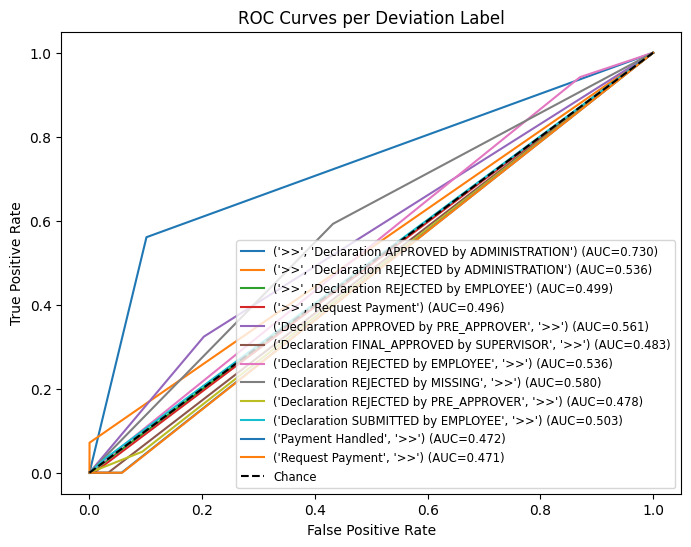

ROC_AUC macro dev per label:  {'per_label_auc': [0.7298034941799338, 0.5356410899889161, 0.4990487340845895, 0.4959807073954984, 0.5605247177530347, 0.48337727006444053, 0.5357664116075165, 0.5802505350759971, 0.4781868131868132, 0.5028735632183908, 0.47150372643577376, 0.47099225485898], 'macro_auc': 0.528662443154157}


In [22]:
roc_auc = eval.plot_macro_roc_auc()
print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [23]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Declaration APPROVED by ADMINISTRATION': 0.5121748400852879, 'Declaration APPROVED by PRE_APPROVER': 0.2718181818181818, 'Declaration FINAL_APPROVED by SUPERVISOR': 0.0352, 'Declaration REJECTED by ADMINISTRATION': 0.07071428571428572, 'Declaration REJECTED by EMPLOYEE': 0.34322738386308066, 'Declaration REJECTED by MISSING': 0.14777777777777779, 'Declaration REJECTED by PRE_APPROVER': 0.04714285714285714, 'Declaration SUBMITTED by EMPLOYEE': 0.02128205128205128, 'Payment Handled': 0.16999999999999998, 'Request Payment': 0.0}
mean likelihood of deviations' correct poistion across all deviations:  0.3704332755632582
min: 0.0
max: 0.5121748400852879


/home/PSPLab/ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/src/notebooks/evaluation/../../evaluation/deviations_evalaution_metrics.py:646: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


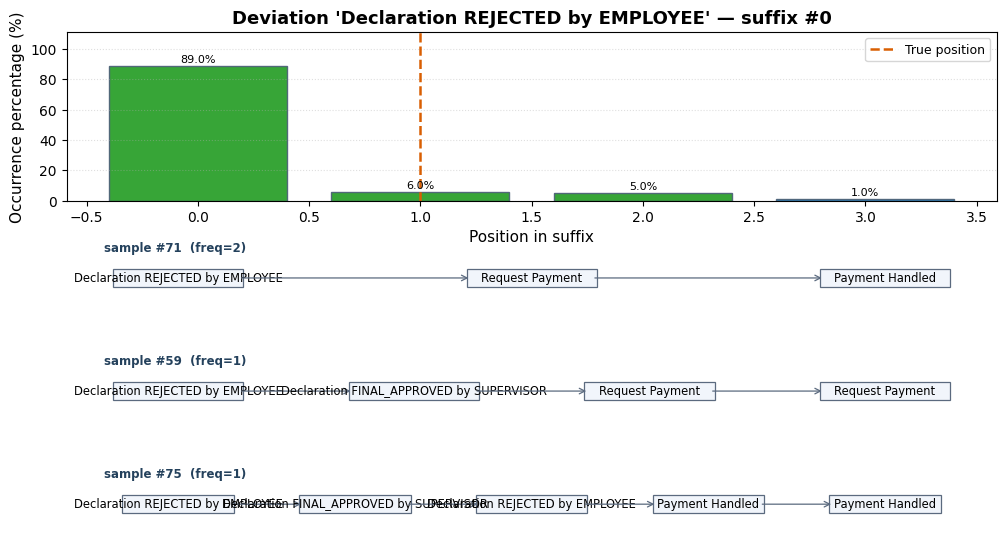

Samples placing 'Declaration REJECTED by EMPLOYEE' at position 0: [59, 71, 75, 81, 82, 96]


In [24]:
eval.plot_suffix_deviation_distribution(suffix_index=0,
                                        label='Declaration REJECTED by EMPLOYEE',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)